In [2]:
import sys, os
sys.path.append(os.path.join(sys.path[0].split('Documents')[0],'Documents/BecaNLP/Utils'))

import NLPUtils as nlp
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to /home/lestien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Cargamos el dataset

,Pregunta,Intencion
0,como puedo trabajar en santander rio,102
1,pagar tarjeta visa querer reintegro,350
2,pagar tarjeta naranja sistema,132
3,no se debitó la primera cuota del plan de bien...,129
4,abonar tarjeta credito,342


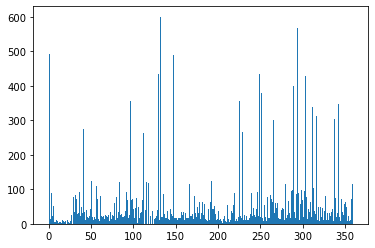

In [2]:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
categories = set(df['Intencion'].values)
name2idx = {name:idx for idx, name in enumerate(categories)}
idx2name = {idx:name for idx, name in enumerate(categories)}
_ = plt.hist(df['Intencion'].values,bins=max(df['Intencion']))
df.head()

# Intentamos con BERT otra vez

In [3]:
from utils import *

# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=2018, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Epoch:  10%|█         | 1/10 [03:10<28:31, 190.22s/it]

Accuracy on validation:  0.5529587270014918


Epoch:  20%|██        | 2/10 [06:21<25:24, 190.60s/it]

Accuracy on validation:  0.6747886623570363


Epoch:  30%|███       | 3/10 [09:33<22:16, 190.98s/it]

Accuracy on validation:  0.7498756837394331


Epoch:  40%|████      | 4/10 [12:45<19:07, 191.26s/it]

Accuracy on validation:  0.8055693684733963


Epoch:  50%|█████     | 5/10 [15:57<15:57, 191.50s/it]

Accuracy on validation:  0.8239681750372949


Epoch:  60%|██████    | 6/10 [19:09<12:46, 191.65s/it]

Accuracy on validation:  0.8428642466434609


Epoch:  70%|███████   | 7/10 [22:21<09:35, 191.80s/it]

Accuracy on validation:  0.8498259572352064


Epoch:  80%|████████  | 8/10 [25:33<06:23, 191.88s/it]

Accuracy on validation:  0.8572849328692193


Epoch:  90%|█████████ | 9/10 [28:45<03:11, 191.97s/it]

Accuracy on validation:  0.8637493784186971


Epoch: 100%|██████████| 10/10 [31:57<00:00, 191.79s/it]

Accuracy on validation:  0.8627548483341622


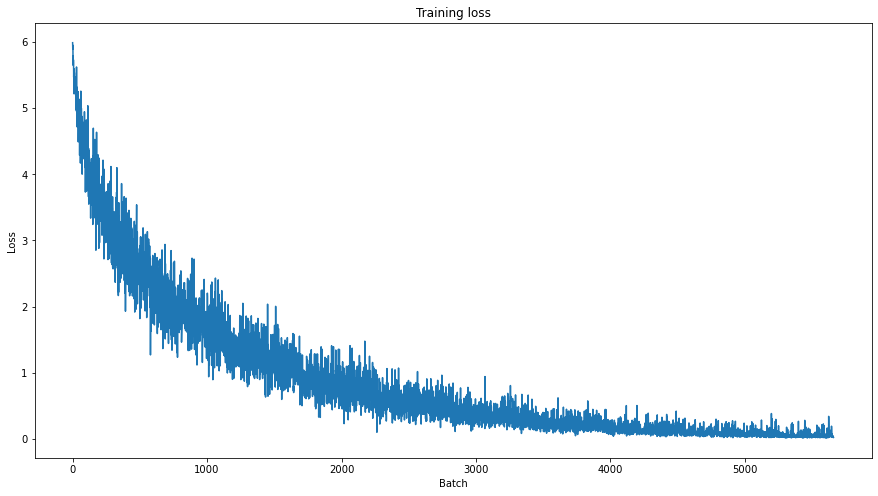

In [4]:
train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Accuracy on validation:  0.46544007956240674


Epoch:  20%|██        | 2/10 [06:24<25:38, 192.34s/it]

Accuracy on validation:  0.6384883142715068


Epoch:  30%|███       | 3/10 [09:37<22:26, 192.35s/it]

Accuracy on validation:  0.7260069617105918


Epoch:  40%|████      | 4/10 [12:49<19:14, 192.36s/it]

Accuracy on validation:  0.7742416708105421


Epoch:  50%|█████     | 5/10 [16:01<16:01, 192.36s/it]

Accuracy on validation:  0.809050223769269


Epoch:  60%|██████    | 6/10 [19:14<12:49, 192.36s/it]

Accuracy on validation:  0.8289408254599702


Epoch:  70%|███████   | 7/10 [22:26<09:37, 192.37s/it]

Accuracy on validation:  0.8503232222774739


Epoch:  80%|████████  | 8/10 [25:39<06:24, 192.40s/it]

Accuracy on validation:  0.8647439085032322


Epoch:  90%|█████████ | 9/10 [28:51<03:12, 192.44s/it]

Accuracy on validation:  0.8582794629537543


Epoch: 100%|██████████| 10/10 [32:03<00:00, 192.39s/it]

Accuracy on validation:  0.8647439085032322


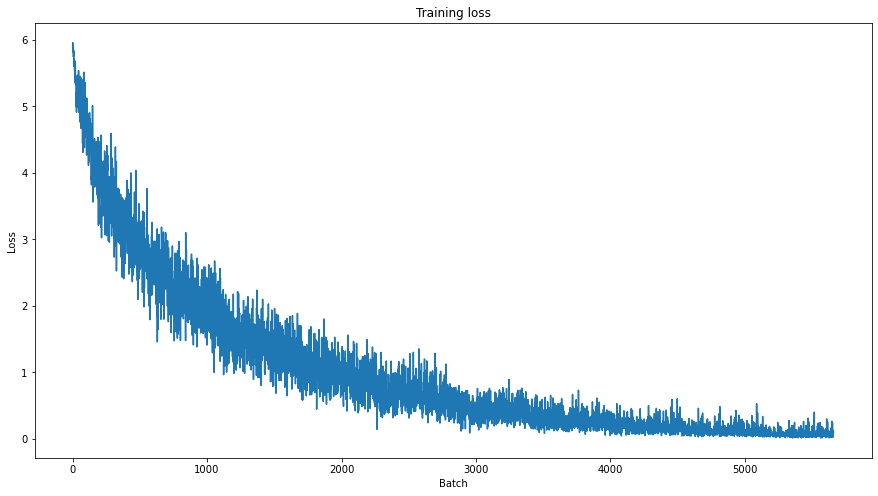

In [5]:
# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=3456234, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Accuracy on validation:  0.5002486325211337


Epoch:  20%|██        | 2/10 [06:24<25:39, 192.40s/it]

Accuracy on validation:  0.6593734460467429


Epoch:  30%|███       | 3/10 [09:37<22:27, 192.44s/it]

Accuracy on validation:  0.7374440576827449


Epoch:  40%|████      | 4/10 [12:49<19:14, 192.48s/it]

Accuracy on validation:  0.7871705619094977


Epoch:  50%|█████     | 5/10 [16:02<16:02, 192.49s/it]

Accuracy on validation:  0.8140228741919443


Epoch:  60%|██████    | 6/10 [19:15<12:50, 192.52s/it]

Accuracy on validation:  0.8423669816011934


Epoch:  70%|███████   | 7/10 [22:27<09:37, 192.56s/it]

Accuracy on validation:  0.8473396320238687


Epoch:  80%|████████  | 8/10 [25:40<06:25, 192.60s/it]

Accuracy on validation:  0.8612630532073595


Epoch:  90%|█████████ | 9/10 [28:53<03:12, 192.63s/it]

Accuracy on validation:  0.8717056190949776


Epoch: 100%|██████████| 10/10 [32:05<00:00, 192.58s/it]

Accuracy on validation:  0.8771755345599205


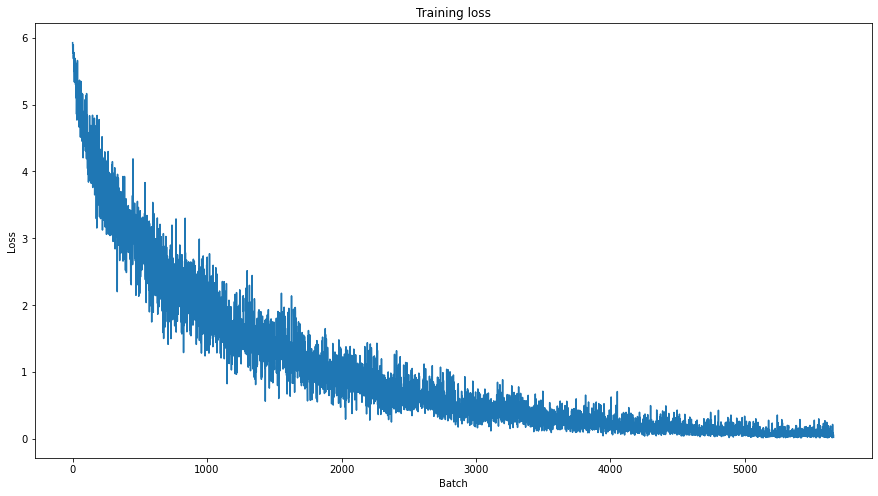

In [6]:
# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=125326, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Accuracy on validation:  0.4828443560417703


Epoch:  20%|██        | 2/10 [06:25<25:42, 192.82s/it]

Accuracy on validation:  0.6195922426653406


Epoch:  30%|███       | 3/10 [09:38<22:30, 192.86s/it]

Accuracy on validation:  0.7066136250621581


Epoch:  40%|████      | 4/10 [12:51<19:17, 192.89s/it]

Accuracy on validation:  0.7633018398806564


Epoch:  50%|█████     | 5/10 [16:04<16:04, 192.86s/it]

Accuracy on validation:  0.7846842366981601


Epoch:  60%|██████    | 6/10 [19:17<12:51, 192.83s/it]

Accuracy on validation:  0.8145201392342118


Epoch:  70%|███████   | 7/10 [22:29<09:38, 192.79s/it]

Accuracy on validation:  0.8284435604177026


Epoch:  80%|████████  | 8/10 [25:42<06:25, 192.76s/it]

Accuracy on validation:  0.8388861263053208


Epoch:  90%|█████████ | 9/10 [28:55<03:12, 192.74s/it]

Accuracy on validation:  0.8488314271506713


Epoch: 100%|██████████| 10/10 [32:07<00:00, 192.79s/it]

Accuracy on validation:  0.8518150174042765


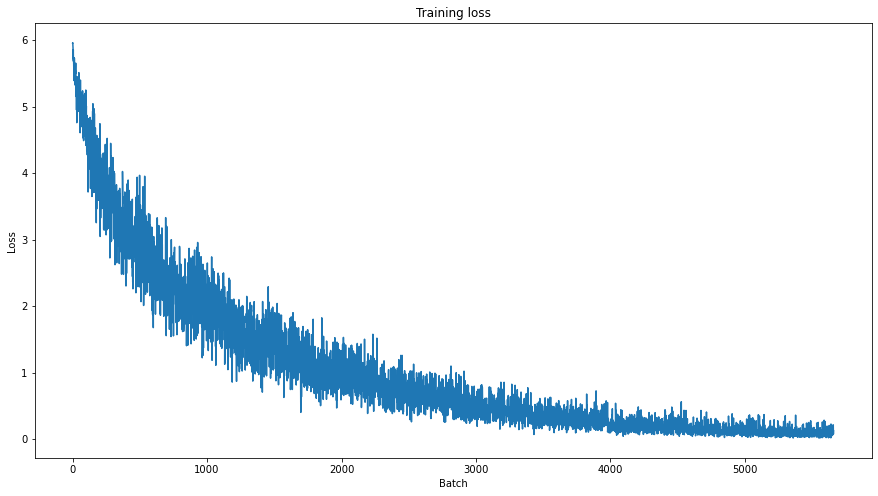

In [7]:
# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=None, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Accuracy on validation:  0.47439085032322226


Epoch:  20%|██        | 2/10 [06:25<25:41, 192.74s/it]

Accuracy on validation:  0.6389855793137742


Epoch:  30%|███       | 3/10 [09:38<22:29, 192.78s/it]

Accuracy on validation:  0.7175534559920438


Epoch:  40%|████      | 4/10 [12:51<19:16, 192.82s/it]

Accuracy on validation:  0.7772252610641472


Epoch:  50%|█████     | 5/10 [16:04<16:04, 192.82s/it]

Accuracy on validation:  0.8030830432620587


Epoch:  60%|██████    | 6/10 [19:16<12:51, 192.83s/it]

Accuracy on validation:  0.8329189457981104


Epoch:  70%|███████   | 7/10 [22:29<09:38, 192.82s/it]

Accuracy on validation:  0.8513177523620089


Epoch:  80%|████████  | 8/10 [25:42<06:25, 192.81s/it]

Accuracy on validation:  0.8528095474888115


Epoch:  90%|█████████ | 9/10 [28:55<03:12, 192.77s/it]

Accuracy on validation:  0.8667329686723023


Epoch: 100%|██████████| 10/10 [32:07<00:00, 192.78s/it]

Accuracy on validation:  0.8662357036300348


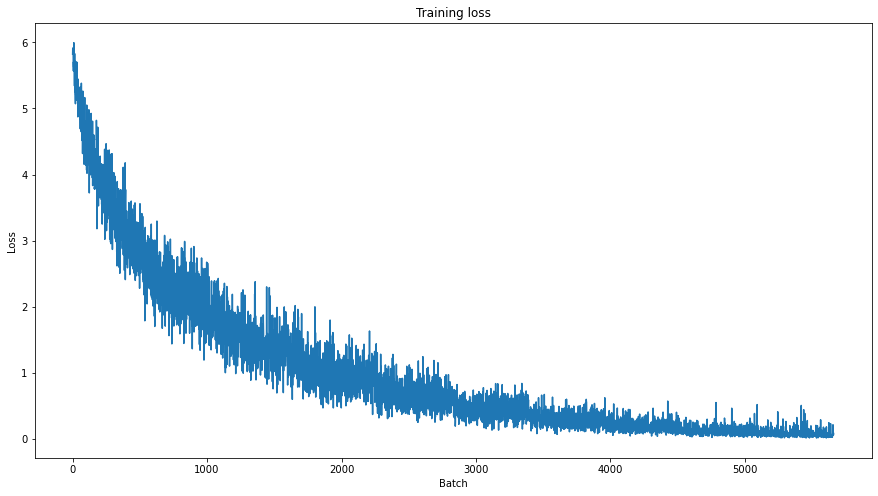

In [8]:
# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=None, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Accuracy on validation:  0.5673794132272502


Epoch:  20%|██        | 2/10 [06:25<25:42, 192.77s/it]

Accuracy on validation:  0.7180507210343113


Epoch:  30%|███       | 3/10 [09:38<22:29, 192.81s/it]

Accuracy on validation:  0.7667826951765291


Epoch:  40%|████      | 4/10 [12:51<19:17, 192.84s/it]

Accuracy on validation:  0.8045748383888612


Epoch:  50%|█████     | 5/10 [16:04<16:04, 192.86s/it]

Accuracy on validation:  0.841869716558926


Epoch:  60%|██████    | 6/10 [19:17<12:51, 192.85s/it]

Accuracy on validation:  0.8612630532073595


Epoch:  70%|███████   | 7/10 [22:29<09:38, 192.83s/it]

Accuracy on validation:  0.8692192938836399


Epoch:  80%|████████  | 8/10 [25:42<06:25, 192.80s/it]

Accuracy on validation:  0.8791645947289906


Epoch:  90%|█████████ | 9/10 [28:55<03:12, 192.72s/it]

Accuracy on validation:  0.8866235703630034


Epoch: 100%|██████████| 10/10 [32:07<00:00, 192.73s/it]

Accuracy on validation:  0.8851317752362009


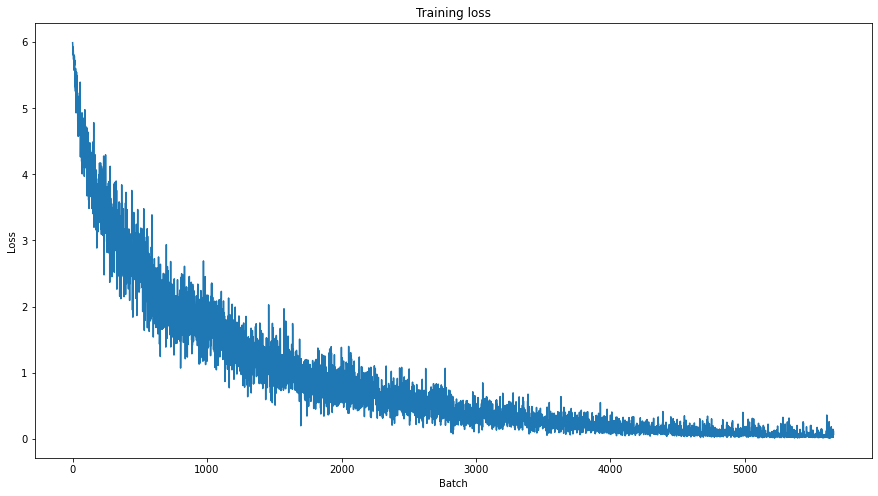

In [9]:
# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=None, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
num_labels = np.max(df['Intencion'].values)+1
model, device = load_classification_model(use_gpu, num_labels)

train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()